# Proceso de análisis de dataset, parte 2 (analizar)

En este informe se enumeran y explican todos los pasos que vamos a dar para completar la fases propia de "análisis" del análisis de datos de este proyecto.
Realizaremos operaciones de consulta en el dataframe en busca de información relevante, que nos ayude a responder las preguntas que nos han proporcionado para dar solución informada al problema empresarial que se nos ha planteado.
Se aporta una breve explicación del proceso realizado, junto con el código ejecutado para tal fin.

# Fase 1 Importar librerías y dataframe

Como en las anteriores fases, el primer paso es importar las librerías que vamos a utilizar para el proceso de análisis.
Usaremos "**Pandas**" para trabajar con la tabla de datos del datafrme, "**NumPy**" para operaciones matemáticas, "**datetime**" gestionará los datos tipo fecha/tiempo, y "**MatPlotlib**" nos ayudará a generar las gráficas para el informe final.

In [1]:
# Importamos las librerías pandas y numpy

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.options.mode.copy_on_write = True

# Fase 2: carga de datos y visualización inicial de los datos

A continuación importamos el dataframe a partir del archivo ".csv" que limpiamos y depuramos en el apartado de "procesamiento" de los datos.

In [2]:
# Importamos nuestro dataset
clean_year_2023 = pd.read_csv("C:/Users/David/Desktop/CURSO GOOGLE DATA ANALYST/proyecto_final/python/clean_year_2023.csv")

Vamos a generar una variable que nos divida el día en horas. Para ello, debemos establecer las variables de 'started_at' y 'ended_at' en formato "pd.datetime()"

In [3]:
# Aplicando formato datetime a las variables "started_at" y "ended_at"
clean_year_2023['started_at'] = pd.to_datetime(clean_year_2023['started_at'])
clean_year_2023['ended_at'] = pd.to_datetime(clean_year_2023['ended_at'])

In [4]:
# Añadimos la variable "hora" (en un día)
clean_year_2023['hour'] = clean_year_2023.started_at.apply(lambda x: x.hour)

Veamos la información del dataframe en este momento

In [5]:
clean_year_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5447717 entries, 0 to 5447716
Data columns (total 22 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Unnamed: 0          int64         
 1   ride_id             object        
 2   rideable_type       object        
 3   started_at          datetime64[ns]
 4   ended_at            datetime64[ns]
 5   ride_time           float64       
 6   week_day            int64         
 7   start_station_name  object        
 8   start_station_id    object        
 9   end_station_name    object        
 10  end_station_id      object        
 11  start_lat           float64       
 12  start_lng           float64       
 13  end_lat             float64       
 14  end_lng             float64       
 15  member_casual       object        
 16  day                 object        
 17  month               int64         
 18  lat                 float64       
 19  long                float64       
 20  ri

# Fase 3: Comenzamos con el análisis

### 1. Vamos a visualizar la cantidad en porcentaje de usuarios miembros y usuarios casuales del total de la tabla.

In [6]:
# Calculamos el número de personas que son miembros de Cyclistic
miembros = clean_year_2023[(clean_year_2023['member_casual'] == 'member')]
numero_de_miembros = miembros['member_casual'].count()
print(f'Hay un total de {numero_de_miembros} usuarios miembros de Cyclistic')

Hay un total de 3536671 usuarios miembros de Cyclistic


In [7]:
# Calculamos el número de personas que son usuarios casuales de Cyclistic
casuales = clean_year_2023[(clean_year_2023['member_casual'] == 'casual')]
numero_de_casuales = casuales['member_casual'].count()
print(f'Hay un total de {numero_de_casuales} usuarios casuales de Cyclistic')

Hay un total de 1911046 usuarios casuales de Cyclistic


In [8]:
# Hallamos el total de usuarios
total_usuarios = numero_de_casuales + numero_de_miembros
print(f'El total de usuarios es de {total_usuarios}')

El total de usuarios es de 5447717


In [9]:
# Hallamos el porcentaje de miembros del total de usuarios
porcentaje_miembros = round((numero_de_miembros / total_usuarios) * 100, 1)
print(f'El porcentaje de miembros es de {porcentaje_miembros}% del total de usuarios')

El porcentaje de miembros es de 64.9% del total de usuarios


In [10]:
# Hallamos el porcentaje de miembros del total de usuarios
porcentaje_casuales = round((numero_de_casuales / total_usuarios) * 100, 1)
print(f'El porcentaje de casuales es de {porcentaje_casuales}% del total de usuarios')

El porcentaje de casuales es de 35.1% del total de usuarios


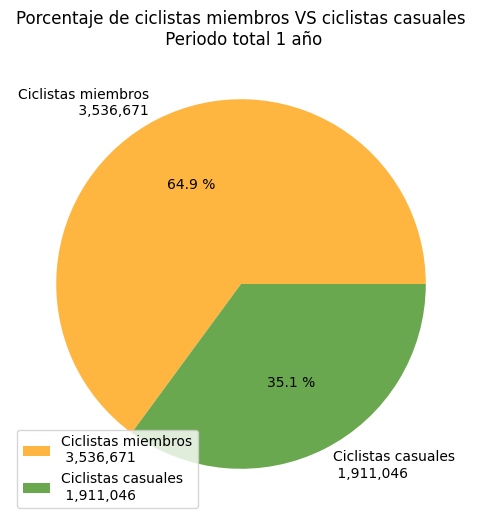

In [11]:
# Datos de la gráfica
x = [numero_de_miembros, numero_de_casuales]
y = [('Ciclistas miembros\n {:,}'.format(numero_de_miembros)), ('Ciclistas casuales\n {:,}'.format(numero_de_casuales))]
colors = ['#ffb641', '#6aa84f']

# Indicamos las dimensiones de nuestra gráfica
plt.figure(figsize = (12, 6))
# Creamos la gráfica
plt.pie(x, labels= y, autopct="%0.1f %%", colors = colors)
# Configuramos los parámetros de la gráfica
plt.title('Porcentaje de ciclistas miembros VS ciclistas casuales\n Periodo total 1 año')
plt.legend(loc = 3)
# Mostramos la gráfica
plt.show()

Los datos nos indican que existe un porcentaje de usuarios miembros de casi el doble que de usuarios casuales. 64.1% de miembros frente a 35.9% de casuales.

### 2. Calculamos la media de tiempo por trayecto para cada tipo de cliente de Cyclistic.

In [12]:
# Tiempo medio por trayecto, para los usuarios miembros
media_trayectos_miembros = round(miembros['ride_time'].mean(), 2)
print(f'El tiempo medio para los viajes realizados por miembros es de {media_trayectos_miembros} minutos')

El tiempo medio para los viajes realizados por miembros es de 12.19 minutos


In [13]:
# Tiempo medio por trayecto, para los usuarios casuales
media_trayectos_casuales = round(casuales['ride_time'].mean(), 2)
print(f'El tiempo medio para los viajes realizados por casuales es de {media_trayectos_casuales} minutos')

El tiempo medio para los viajes realizados por casuales es de 19.08 minutos


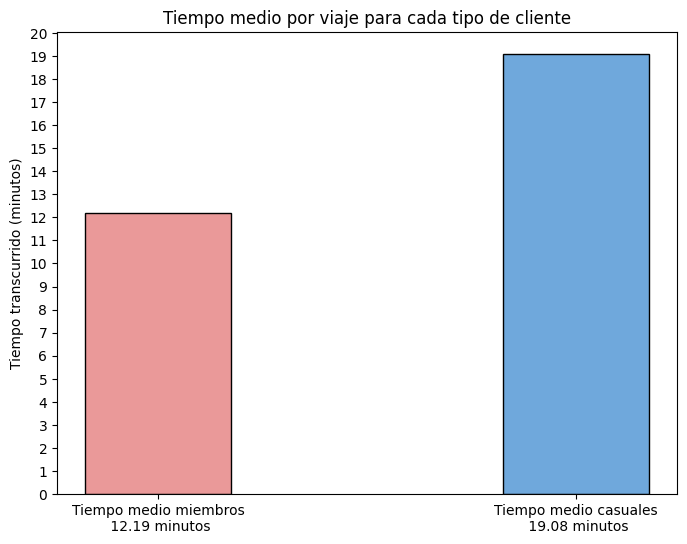

In [14]:

# Datos de la gráfica
eje_a = np.arange(0, 2)
columnas_tiempo = [media_trayectos_miembros, media_trayectos_casuales]
etiquetas = ['Tiempo medio miembros', 'Tiempo medio casuales']
y = [('Tiempo medio miembros\n {:,}'.format(media_trayectos_miembros)+ ' minutos'), ('Tiempo medio casuales\n {:,}'.format(media_trayectos_casuales)+ ' minutos')]
colores = ['#ea9999', '#6fa8dc']

# Indicamos las dimensiones de nuestra gráfica
plt.figure(figsize = (8, 6))
# Creamos las columnas de la gráfica
plt.bar(eje_a, columnas_tiempo, width= 0.35, color = colores, edgecolor = 'black')
# Configuramos los parámetros de la gráfica
plt.title('Tiempo medio por viaje para cada tipo de cliente')
plt.xticks(ticks = eje_a, labels= y)
plt.yticks(range(21))
plt.ylabel('Tiempo transcurrido (minutos)')
# Mostramos la gráfica
plt.show()


Existe una ligera diferencia de 8 minutos a favor de los viajes realizados por ciclistas casuales con respecto a los ciclistas miembros de Cyclistic.

Esto nos indica que los ciclistas casuales realizan viajes de mayor duración media que los ciclistas miembros.

### 3. Vamos a averiguar la distancia media por trayecto para cada grupo de ciclistas.

In [15]:
# Distancia media de trayectos realizados por miembros de Cyclistic
ride_distance_members = round((miembros['ride_distance']).mean(), 2)
print(f'La distancia media de los viajes realizados por ciclistas miembros de Cyclistic es de {ride_distance_members} km')

La distancia media de los viajes realizados por ciclistas miembros de Cyclistic es de 2.43 km


In [16]:
# Distancia media de trayectos realizados por casuales de Cyclistic
ride_distance_casual = round((casuales['ride_distance']).mean(), 2)
print(f'La distancia media de los viajes realizados por ciclistas casuales de Cyclistic es de {ride_distance_casual} km')

La distancia media de los viajes realizados por ciclistas casuales de Cyclistic es de 2.43 km


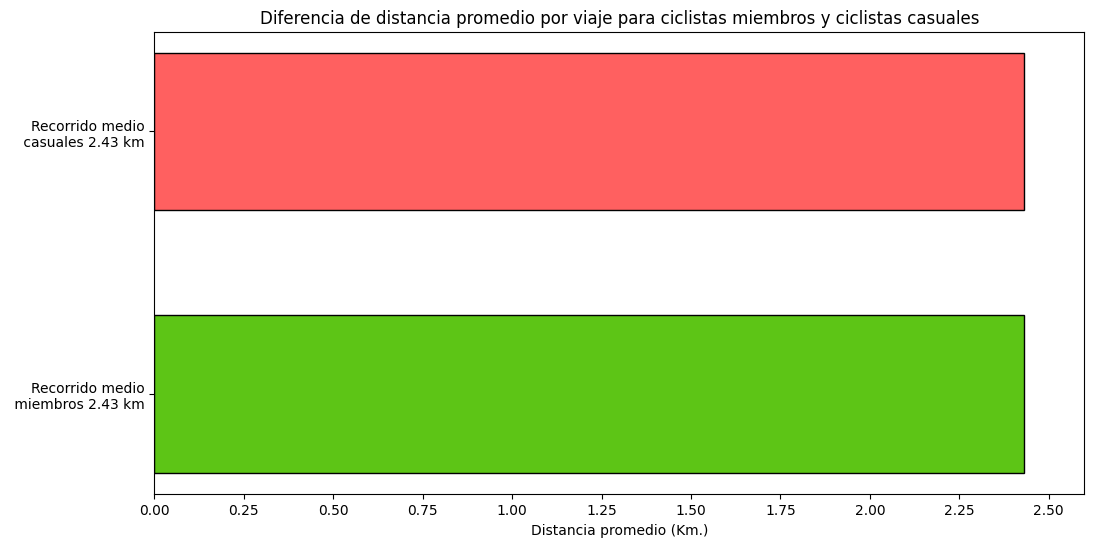

In [17]:
# Datos de la gráfica
x = [ride_distance_members, ride_distance_casual]
y = ('Recorrido medio\n miembros {:,}'.format(ride_distance_members)+ ' km'), ('Recorrido medio\n casuales {:,}'.format(ride_distance_casual)+ ' km')
colors = ['#5dc516', '#ff6060']

# Indicamos las dimensiones de nuestra gráfica
plt.figure(figsize = (12, 6))
# Creamos las columnas de la gráfica
plt.barh(y, x, height=0.6, color=colors, edgecolor = 'black')
# Configuramos los parámetros de la gráfica
plt.title('Diferencia de distancia promedio por viaje para ciclistas miembros y ciclistas casuales')
plt.xticks(np.arange(0, 2.7, 0.25))
plt.xlim(0, 2.6)
plt.xlabel('Distancia promedio (Km.)')
# Mostramos la gráfica
plt.show()

A pesar de existir grandes diferencias entre el número total de cada tipo de ciclista, y del tiempo medio por trayecto para cada tipo, la distancia media de los viajes realizados por cada tipo de ciclista no representa diferencia. Dicha diferencia se puede apreciar de manera ínfima si traducimos las cifras a metros.

### 4. Veamos el tipo de bicicleta utilizada por cada tipo de cliente de Cyclistic.

In [18]:
# Cálculo de las bicis utilizadas por ciclistas miembros (por tipo de bici)
bicis_miembros = miembros['rideable_type'].groupby(miembros['rideable_type']).count()
print(f'Las bicis utilizadas por ciclistas miembros por tipo de bici son:\n {bicis_miembros}')

# Cálculo de las bicis utilizadas por ciclistas casuales (por tipo de bici)
bicis_casual = casuales['rideable_type'].groupby(casuales['rideable_type']).count()
print(f'Las bicis utilizadas por ciclistas casuales por tipo de bici son:\n {bicis_casual}')

# Cálculo de las bicis utilizadas por ciclistas en total(por tipo de bici)
total_bikes = clean_year_2023['rideable_type'].count()
print(f'El número total de bicis utilizadas en un año ha sido:\n {total_bikes}')


Las bicis utilizadas por ciclistas miembros por tipo de bici son:
 rideable_type
classic_bike     1778684
electric_bike    1757987
Name: rideable_type, dtype: int64
Las bicis utilizadas por ciclistas casuales por tipo de bici son:
 rideable_type
classic_bike      856232
electric_bike    1054814
Name: rideable_type, dtype: int64
El número total de bicis utilizadas en un año ha sido:
 5447717


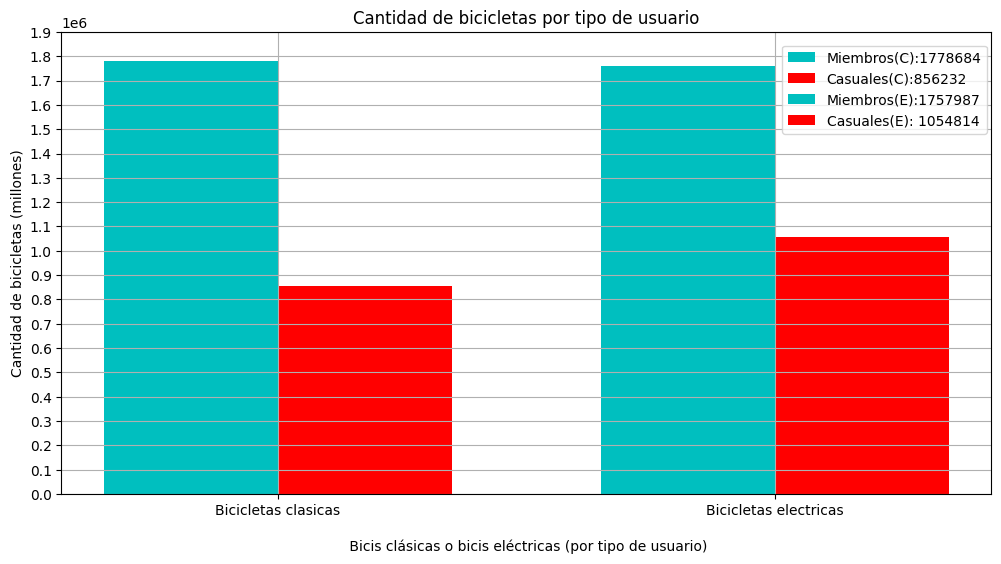

In [19]:
# Datos de la gráfica
member_classic_bikes = 1778684
member_electric_bikes = 1757987
casual_classic_bikes = 856232
casual_electric_bikes = 1054814
#etiquetamos las columnas
labels = ['Bicicletas clasicas', 'Bicicletas electricas']
eje_r = np.arange(2)

# Indicamos las dimensiones de nuestra gráfica
plt.figure(figsize= (12, 6))
# Creamos las columnas de la gráfica
plt.bar(eje_r[0] - 0.35/2, member_classic_bikes, color = 'c', width= 0.35, label = (f'Miembros(C):{member_classic_bikes}'))
plt.bar(eje_r[0] + 0.35/2, casual_classic_bikes, color = 'r', width= 0.35, label = (f'Casuales(C):{casual_classic_bikes}'))
plt.bar(eje_r[1] - 0.35/2, member_electric_bikes, color = 'c', width= 0.35, label = (f'Miembros(E):{member_electric_bikes}'))
plt.bar(eje_r[1] + 0.35/2, casual_electric_bikes, color = 'r', width= 0.35, label = (f'Casuales(E): {casual_electric_bikes}'))
# Configuramos los parámetros de la gráfica
plt.title('Cantidad de bicicletas por tipo de usuario')
plt.legend(loc = (0.775, 0.78))
plt.xticks(ticks = eje_r , labels = labels)
plt.yticks(range(0, 2000000, 100000))
plt.xlabel('\n Bicis clásicas o bicis eléctricas (por tipo de usuario)')
plt.ylabel('Cantidad de bicicletas (millones)')
plt.grid()
# Mostramos la gráfica
plt.show()

##### Observemos las estadísticas de uso de las bicicletas de una forma diferente

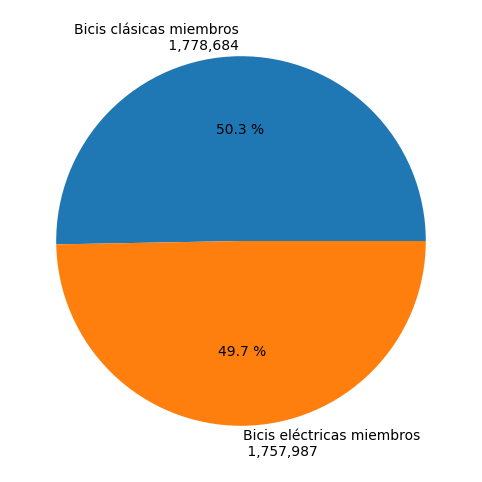

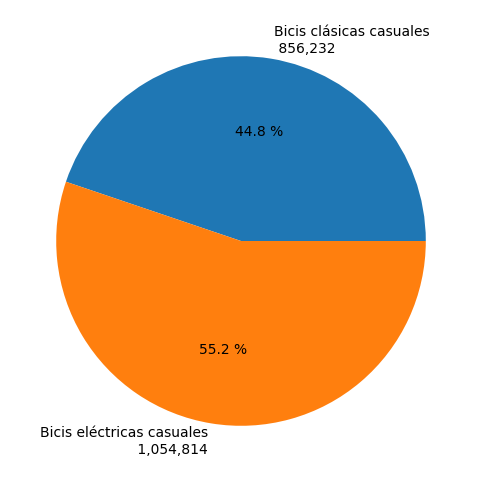

In [20]:
# Creamos las variables que configuran la gráfica 1
pie_miembros = [member_classic_bikes, member_electric_bikes]
labels_miembros = [('Bicis clásicas miembros\n {:,}'.format(member_classic_bikes)), ('Bicis eléctricas miembros\n {:,}'.format(member_electric_bikes))]
# Creamos las variables que configuran la gráfica 2
pie_casuals = [casual_classic_bikes, casual_electric_bikes]
labels_casuals = [('Bicis clásicas casuales\n {:,}'.format(casual_classic_bikes)), ('Bicis eléctricas casuales\n {:,}'.format(casual_electric_bikes))]

# Establecemos las dimensiones de la gráfica 1 (miembros)
plt.figure(num = 1, figsize= (12, 6))
# Creamos la gráfica 1
plt.pie(pie_miembros, labels= labels_miembros, autopct= '%0.1f %%', )
# Mostramos la gráfica 1
plt.show()

# Establecemos las dimensiones de la gráfica 2 (casuales)
plt.figure(num=2, figsize= (12, 6))
# Creamos la gráfica 2
plt.pie(pie_casuals, labels = labels_casuals, autopct= '%0.1f %%')
# Mostramos la gráfica 2
plt.show()

En el grupo de usuarios miembros de Cyclistic, podemos observar que el tipo de bici más utilizado es la "bicicleta clásica" habiendo una pequeña diferencia sobre las "bici eléctrica".

Esta diferencia se hace más notable en el grupo de ciclistas ocasionales, donde la bici más utilizada es del tipo "bici eléctrica" con una ventaja de casi 20.000 viajes más con respecto a las bicis "bicicleta clásica".

### 5. A continuación vamos a estudiar 3 distribuciones temporales sobre el uso de las bicicletas, en función del tipo de usuario.
    - El uso por horas en un día
    - El uso por días en la semana
    - El uso por meses en todo el año
    

- Empezamos viendo la distribución por horas en un día de uso de las bicicletas para cada tipo de cliente.

In [21]:
# Recuento de viajes realizados por clientes miembros por horas.
hora_miembros = miembros['hour'].groupby(miembros['hour']).count()
members_hour = np.array(hora_miembros)


In [22]:
# Recuento de viajes realizados por clientes casuales por horas.
hora_casual = casuales['hour'].groupby(casuales['hour']).count()
casuals_hour = np.array(hora_casual)

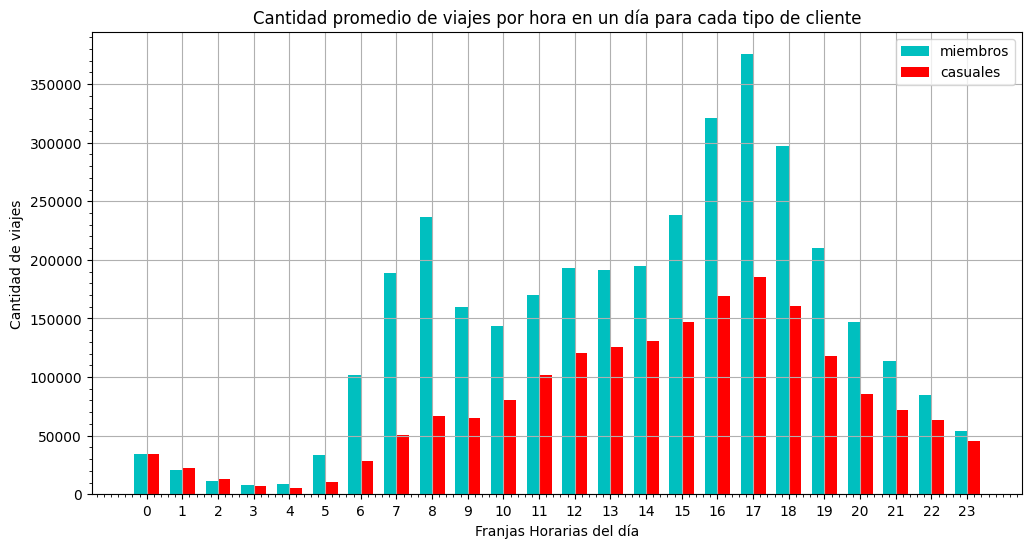

In [23]:
# Establecemos el número de grupos de columnas que vamos a tener en la gráfica
eje_x = np.arange(0,24 )
# Indicamos las dimensiones de nuestra gráfica
plt.figure(figsize= (12, 6))
# Creamos las columnas de la gráfica
plt.bar(eje_x - 0.35/2, members_hour, color = 'c', width = 0.35)
plt.bar(eje_x + 0.35/2, casuals_hour, color = 'r', width = 0.35)
# Configuramos los parámetros de la gráfica
plt.title('Cantidad promedio de viajes por hora en un día para cada tipo de cliente')
plt.legend(labels = ['miembros', 'casuales'])
plt.xticks(range(0,24))
plt.xlabel('Franjas Horarias del día')
plt.ylabel('Cantidad de viajes')
plt.grid()
plt.minorticks_on()
# Mostramos la gráfica
plt.show()

En el grupo de ciclistas miembros, observamos dos zonas horarias que experimentan picos de demanda. El primero va desde las 6h hasta las 10h que corresponden a los horarios de entrada a los lugares de trabajo. El segundo pico se establece desde las 15h hasta las 19h aproximadamente que puede ser causado por los horarios de salida de los trabajadores.

En contraste, en el grupo de usuarios casuales solo vemos una tendencia al alza que comienza progresivamente desde las 6h, alcanzando su punto máximo alrededor de las 17h y baja de nuevo de forma progresiva al finalizar el día. Este comportamiento es más típico de aquellos usuarios que aprovechan las horas de luz del día. Es decir, gente que viaja por ocio.

- A continuación vemos el uso de las bicicletas por día de la semana, para cada grupo de usuario.

In [24]:
#creamos una lista con los días de la semana para utilizarla como lista de ordenamiento
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Recuento de viajes realizados por clientes miembros por días de la semana.
# Necesitamos incluir "reindex(dias_semana)" ya que los días de la semana en USA comienzan por Sunday y queremos que la semana comience por Monday
dia_miembros = miembros['day'].groupby(miembros['day']).count().reindex(dias_semana)
# Recuento de viajes realizados por clientes miembros por días de la semana.
dia_casuales = casuales['day'].groupby(casuales['day']).count().reindex(dias_semana)
orden = {'Lunes':dias_semana[0], 'Martes':dias_semana[1], 'Miércoles':dias_semana[2], 'Jueves':dias_semana[3], 'Viernes':dias_semana[4], 'Sábado':dias_semana[5], 'Domingo':dias_semana[6]}


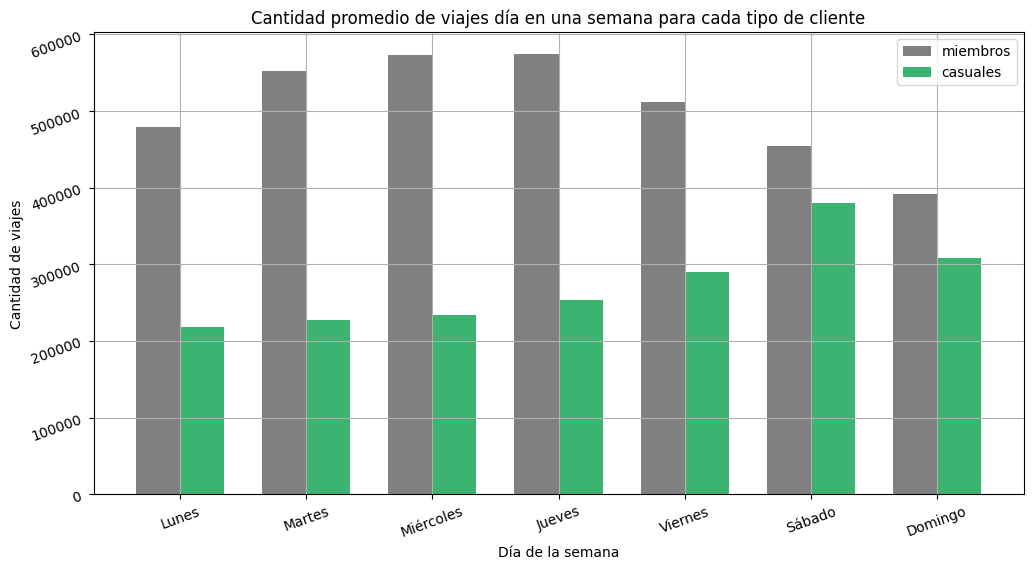

In [25]:
# Indicamos las dimensiones de nuestra gráfica
plt.figure(figsize=(12,6))
# Creamos las columnas de la gráfica
plt.bar(np.arange(0, 7) - 0.35/2, dia_miembros, color = 'grey', width = 0.35)
plt.bar(np.arange(0, 7) + 0.35/2, dia_casuales, color = 'mediumseagreen', width = 0.35)
# Configuramos los parámetros de la gráfica
plt.title('Cantidad promedio de viajes día en una semana para cada tipo de cliente')
plt.legend(labels = ['miembros', 'casuales'])
plt.xticks(ticks = np.arange(0, 7), labels = orden, rotation = 20)
plt.yticks(rotation = 20)
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de viajes')
plt.grid()
# Mostramos la gráfica
plt.show()

Observamos que en el grupo de los miembros de Cyclistic, comienzan el lunes con un volumen medio, mientras que el mayor volumen de viajes se distribuye uniformemente desde el martes hasta el viernes. El sábado retorna a un valor más parecido al del lunes, y el domingo es el día con menos cantidad de viajes.

En cambio, en el caso de los ciclistas casuales, el volumen de viajes se mantiene estable desde el lunes hasta el viernes, donde comienza un ascenso y encontramos el pico de demanda durante el sábado y el domingo.

Estas cifras corresponden a volumenes típicos de gente que utiliza los servicios de Cyclistic para desplazarse al trabajo en el caso de los miembros, mientras que el grupo de los ciclistas ocasionales, hacen uso del servicio de bicicletas durante el fin de semana, que guarda cierta relación con usuarios de ocio.

- En la siguiente gráfica vamos a representar los viajes realizados por los ciclistas repartidos por meses y para cada tipo de cliente, miembro o casual.

In [26]:
# Creamos la lista de los meses del año para utilizarla como lista de reordenamiento
lista_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
mes_miembros = miembros['month'].groupby(miembros['month']).count()
mes_casuales = casuales['month'].groupby(casuales['month']).count()

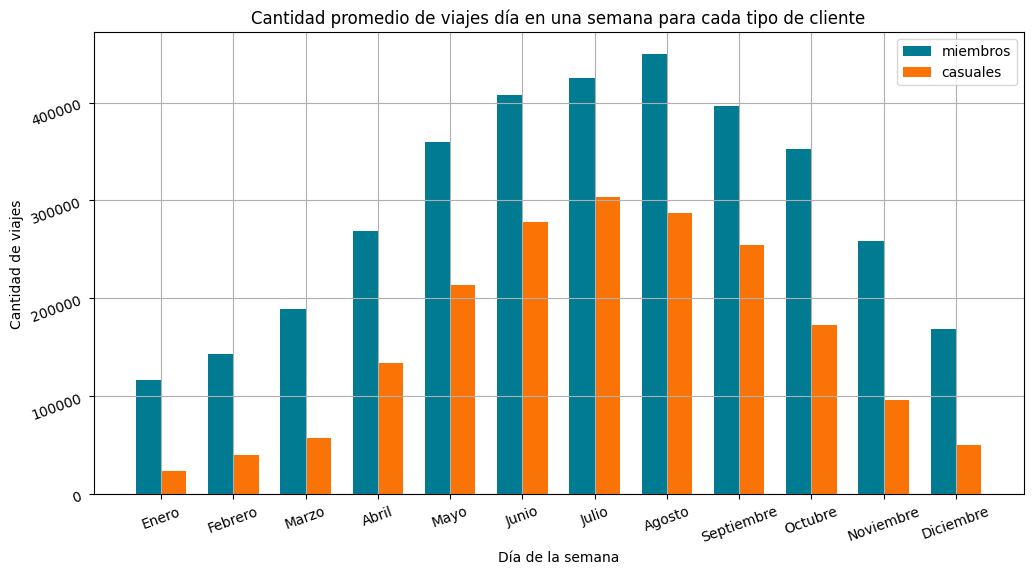

In [28]:
# Indicamos las dimensiones de nuestra gráfica
plt.figure(figsize=(12,6))
# Creamos las columnas de la gráfica
plt.bar(np.arange(0, 12) - 0.35/2, mes_miembros, color = '#017b92', width = 0.35)
plt.bar(np.arange(0, 12) + 0.35/2, mes_casuales, color = '#f97306', width = 0.35)
# Configuramos los parámetros de la gráfica
plt.title('Cantidad promedio de viajes día en una semana para cada tipo de cliente')
plt.legend(labels = ['miembros', 'casuales'])
plt.xticks(ticks = np.arange(0, 12), labels = lista_meses, rotation = 20)
plt.yticks(rotation = 20)
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de viajes')
plt.grid()
# Mostramos la gráfica
plt.show()

En esta gráfica podemos ver con claridad, que a pesar de la diferencia en el número de viajes hechos por cada tipo de ciclista, se marca una tendencia similar.
Los meses de verano son los que más demenda de bicicletas presentan en ambos casos.

Esto puede indicarnos un punto de partida para el estudio de estrategias de negocio.

# Fase 4: Insights detectados

Durante el proceso de análisis, y partiendo inicialmente en base a las preguntas que nos han hecho llegar los interesados en el proyecto, hemos detectado los siguientes puntos clave para enfocar una estrategia empresarial adecuada a la información obtenida.

Los puntos clave encontrados han sido los siguientes:

* Los ciclistas socios tienen abonos anuales porque su frecuencia de utilización es mayor que la de ciclistas ocasionales.
* El uso mayoritario de las bicis utilizadas por los socios es para desplazamientos a diario y de una duración menor que los clientes ocasionales, cuyo uso aumenta el fin de semana y los desplazamientos son sensiblemente más duración. No se aprecian diferencias significativas respecto a la distancia de los desplazamientos de ambos grupos.
* Existe una breve diferencia con respecto al tipo de bici utilizada por los clientes socios, mientras que los clientes ocasionales se decantan preferiblemente por las bicicletas eléctricas.
* El uso horario dentro del grupo de ciclistas socios, responde a un uso para desplazamientos al trabajo, dado que se observan picos de demanda en las franjas horarias que coinciden con los horarios laborales. En cambio el horario de uso de los ciclistas ocasionales, responde más a un uso recreacional, ya que se observa el pico de demanda coincidiendo con las horas de más iluminación natural diaria.
* Durante la semana, se observa un comportamiento de uso en el grupo de socios más enfocado al uso de la bicicleta como medio de transporte cotidiano, dado que la demanda se mantiene alta de lunes a viernes, mostrando una breve relajación durante el sábado y el domingo. El comportamiento del grupo ocasional en cambio, muestra una tendencia más cercana al uso lúdico, siendo los días con más demanda el viernes, sábado y domingo.
* A pesar de la diferencia en la cantidad de viajes de ambos grupos, se aprecia claramente un comportamiento similar a lo largo del año, produciéndose una demanda significativamente mayor durante los meses de verano en los dos grupos. Si bien el mayor rango de uso en los ciclistas socios, denota un uso más habitual de la bicicleta y menos recreacional.
